In [78]:
import numpy
import heapq
import math
from collections import defaultdict
from haversine import haversine


# parsing functions for data, to turn into a graph
routes_infile = 'data/routes.dat'
# routes_infile = 'data copy/routetesting.dat'
airports_infile = 'data/airports.dat'
test = False


class Graph:
    def __init__(self, source_list_, dest_list_, routes_, airports_):
        self.source_list = source_list_
        self.dest_list = dest_list_
        self.routes = routes_
        self.airports = airports_
        self.adj_list = defaultdict(list)
        
    
    def create_adjacency_list(self):
        # building edges
        for index, source in enumerate(self.source_list):
            source_airport = iata_to_airport(source, self.airports)
            dest_airport = iata_to_airport(self.dest_list[index], self.airports)
            if source_airport == None or dest_airport == None:
                continue
            if source_airport not in self.adj_list:
                distance = calculate_distance(source_airport, dest_airport)
                self.adj_list[source].append((dest_airport, distance))
        print(len(self.adj_list))
    

    # def create_adjacency_list(self):
    #     # building edges
    #     for index, source in enumerate(self.source_list):
    #         source_airport = iata_to_airport(source, self.airports)
    #         dest_airport = iata_to_airport(self.dest_list[index], self.airports)
    #         if source_airport == None or dest_airport == None:
    #             continue
    #         # if source_airport not in self.adj_list:
    #         distance = calculate_distance(source_airport, dest_airport)
    #         self.adj_list[source].append((dest_airport, distance))
    #     print(len(self.adj_list))

                 

class Airport:
    def __init__(self, name_, iata_, lat_, long_):
        self.name = name_
        self.iata = iata_
        self.lat = float(lat_)
        self.long = float(long_)
        self.distance_to_goal = float('inf')
    
    

class Route:
    # source and dest are IATA codes
    # routes stored in a 'routes' list
    def __init__(self, source_, dest_):
        self.source = source_
        self.dest = dest_



def create_source_list(routes):
    source_list = []
    for route in routes:
        source_list.append(route.source)
    return source_list

                 
def create_dest_list(routes):
    dest_list = []
    for route in routes:
        dest_list.append(route.dest)
    return dest_list
                 

def iata_to_airport(iata, airports):
    # print(f'"{iata}"')
    # print(iata)
    for airport in airports:
        # print(airport.iata)
        if airport.iata == iata:
            return airport
        
    # print('FUCK UP')
    return None
                 

def calculate_distance(source_airport: Airport, dest_airport: Airport):
    source_lat_long = (source_airport.lat, source_airport.long)
    dest_lat_long = (dest_airport.lat, dest_airport.long)
    return haversine(source_lat_long, dest_lat_long)
    # return math.sqrt(((source_airport.long - dest_airport.long) * (source_airport.long - dest_airport.long)) + ((source_airport.lat - dest_airport.lat) * (source_airport.lat - dest_airport.lat)))


In [29]:


def create_routes(routes_infile):
    routes_file = open(routes_infile, "r")
    routes = []
    count = 0
    for line in routes_file:
        if count == 11 and test:
            break
        splits = line.split(",")
        source = splits[2]
        dest = splits[4]
        route = Route(source, dest)
        routes.append(route)
        count = count + 1
    return routes
    


67663


In [30]:


def create_airports(airports_infile):
    airports_file = open(airports_infile, "r")
    airports = []
    count = 0
    for line in airports_file:
        #if count == 10:
        #    break
        splits = line.split(",")
        name = splits[1]
        iata = splits[4]
        iata = iata.replace('"', '')
        lat = splits[6]
        long = splits[7]
        airport = Airport(name, iata, lat, long)
        airports.append(airport)
        count = count +1
    return airports
    

7698


In [31]:
# make this shit into a graph
# important part: graph's adjacency list!

source_list = create_source_list(routes)
dest_list = create_dest_list(routes)


graph = Graph(source_list, dest_list, routes, airports)
graph.create_adjacency_list()

# for k, v in graph.adj_list.items():
#     print(k, v)


3241


In [32]:
graph.adj_list['AER']

[(<__main__.Airport at 0x12c266520>, 1506.827685775098),
 (<__main__.Airport at 0x12c266160>, 2470.1610264704595),
 (<__main__.Airport at 0x12c1efe80>, 945.5352215178185),
 (<__main__.Airport at 0x12c2628e0>, 1449.4351668481136),
 (<__main__.Airport at 0x12c266280>, 2409.440037874499),
 (<__main__.Airport at 0x12c1efbe0>, 273.30769305738727),
 (<__main__.Airport at 0x12c2c3520>, 519.7342787444804),
 (<__main__.Airport at 0x12c262ac0>, 187.01432525242404),
 (<__main__.Airport at 0x12c2c7b80>, 1337.8588863425516),
 (<__main__.Airport at 0x12c2c3520>, 519.7342787444804),
 (<__main__.Airport at 0x12c444880>, 950.9870706916008),
 (<__main__.Airport at 0x12c262ac0>, 187.01432525242404),
 (<__main__.Airport at 0x12c2626a0>, 1932.5928053953896),
 (<__main__.Airport at 0x12c262a60>, 2704.8257754044093),
 (<__main__.Airport at 0x12c266340>, 1404.1600196860334),
 (<__main__.Airport at 0x12c262fa0>, 2080.6437088410453),
 (<__main__.Airport at 0x12c266280>, 2409.440037874499),
 (<__main__.Airport a

## graph has been made !! lets visualize it to make sure it looks right

In [93]:
# !pip install geopandas
# !pip install shapely

import geopandas as gpd
from shapely.geometry import LineString
import pandas as pd

In [59]:
# creating a new, unique dataframe that i can use to graph the paths

lats_longs = defaultdict(list)


for route in routes:
    source_airport = iata_to_airport(route.source, airports)
    dest_airport = iata_to_airport(route.dest, airports)
    if source_airport and dest_airport:
        lats_longs["source_lats"].append(source_airport.lat)
        lats_longs["source_longs"].append(source_airport.long)
        lats_longs["dest_lats"].append(dest_airport.lat)
        lats_longs["dest_longs"].append(dest_airport.long)


df = pd.DataFrame.from_dict(lats_longs)


In [63]:
geometry = [LineString([[df.iloc[i]['source_longs'], df.iloc[i]['source_lats']], [df.iloc[i]['dest_longs'], df.iloc[i]['dest_lats']]]) for i in range(df.shape[0])]
routes = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
print(routes)

       source_lats  source_longs  dest_lats  dest_longs  \
0        43.449902     39.956600  55.606201   49.278702   
1        46.283298     48.006302  55.606201   49.278702   
2        46.283298     48.006302  44.225101   43.081902   
3        55.305801     61.503300  55.606201   49.278702   
4        55.305801     61.503300  55.012600   82.650703   
...            ...           ...        ...         ...   
66929   -33.058899    137.514008 -34.945000  138.531006   
66930    55.408798     37.906300  43.061298   74.477600   
66931    43.061298     74.477600  55.408798   37.906300   
66932    43.061298     74.477600  40.609001   72.793297   
66933    40.609001     72.793297  43.061298   74.477600   

                                                geometry  
0      LINESTRING (39.95660 43.44990, 49.27870 55.60620)  
1      LINESTRING (48.00630 46.28330, 49.27870 55.60620)  
2      LINESTRING (48.00630 46.28330, 43.08190 44.22510)  
3      LINESTRING (61.50330 55.30580, 49.27870 55.60620

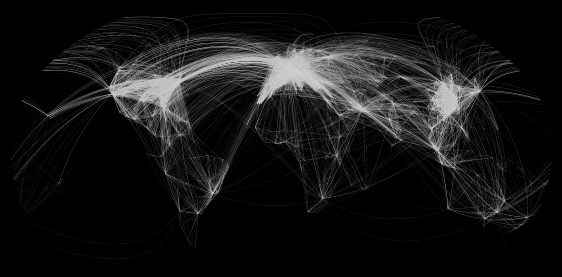

In [66]:
# referenced https://freedium.cfd/https://towardsdatascience.com/mapping-the-worlds-flight-paths-with-python-232b9f7271e5

# import matplotlib.pyplot as plt

# fig = plt.figure(facecolor='black')
# ax = plt.axes()

# fig.set_size_inches(7, 3.5)
# ax.patch.set_facecolor('black')

# routes.plot(ax=ax, color='white', linewidth=0.1)

# plt.setp(ax.spines.values(), color='black')
# plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

# plt.show()

# !pip install cartopy

import cartopy.crs as ccrs

fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)

plt.show()


## flight planning algorithm, A*

In [66]:
import time

# NEED TO MAKE THE HEAP WORK ON F_SCORE, not highest alphabet order !!!!!

# something is fishy with the heap - need to investigate that everything is being put into the heap
# found that certain elements aren't being put into heap - which elements?
# found that the best elements (minimum cost) aren't being put into the heap!
# solution: the elements were being put into the heap, but they were immediately being popped out (taking the best node), so it looked like they weren't going in. this was because of a pop statement at the end of the loop.
# moved the pop to the start, because we need to extract the current best, not the best after looking at connections

# this is the 'h' function. cost is g + h, where g is the current cost of the path
def distance_to(current_airport, goal_airport):
    return calculate_distance(current_airport, goal_airport)


def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom.keys():
        current = cameFrom[current]
        total_path.append(current)
    return total_path[::-1]


# start is the airport iata code
def a_star(adj_list, start, goal, airports):
    start_airport = iata_to_airport(start, airports)
    goal_airport = iata_to_airport(goal, airports)
    
    heap = []
    # heapq.heapify(heap)
    
    came_from = {}
    
    # cost of the cheapest path from the start to n
    g_score = defaultdict(lambda: float('inf'))
    g_score[start] = 0
    
    f_score = defaultdict(lambda: float('inf'))
    f_score[start] = distance_to(start_airport, goal_airport)
    
    heapq.heappush(heap, (f_score[start], start))
    
    while heap:
        current = heapq.heappop(heap)
        print('working on ', current)
        if current[1] == goal:
            return reconstruct_path(came_from, current[1])
        
        for connection in adj_list[current[1]]:
            # print(f"""({connection[0].iata}, {connection[1]}""")
            # print(distance_to(connection[0], goal_airport))
            time.sleep(.1)
            potential_g_score = g_score[current[1]] + connection[1]
            # if connection[0].iata == 'GSP':
            #     print('THIS IS GSP')
            #     print(potential_g_score)
            #     print('bleh')
            #     print(g_score[connection[0].iata])
            
            if potential_g_score < g_score[connection[0].iata]:
                
                came_from[connection[0].iata] = current[1]
                g_score[connection[0].iata] = potential_g_score
                f_score[connection[0].iata] = potential_g_score + distance_to(connection[0], goal_airport)
                
                # if connection[0].iata == 'GSP':
                #     print('THIS IS GSP')
                #     print(f_score[connection[0].iata])
                
                if (f_score[connection[0].iata], connection[0].iata, g_score[connection[0].iata], distance_to(connection[0], goal_airport)) not in heap:
                    # if connection[0].iata == 'GSP':
                        # print('PUSHING GSP ONTO HEAP')
                        # print(connection[0].iata)
                    heapq.heappush(heap, (f_score[connection[0].iata], connection[0].iata))
        
        print(heap)
        print()
        print()
                    
    return "FAILED TO FIND PATH"

    

In [69]:
print(a_star(graph.adj_list, 'AER', 'ASF', graph.airports))

working on  (707.8581273104371, 'AER')
[(887.2067677717141, 'KRR'), (1157.3029271922828, 'TZX'), (1261.9020702971518, 'EVN'), (2573.098634800883, 'DME'), (2589.013563956934, 'IST'), (2547.2674426566205, 'KZN'), (2400.916722098466, 'KIV'), (2640.5602627412472, 'VKO'), (3097.9514587903254, 'MSQ'), (4200.344589308463, 'TAS'), (3834.6703071011475, 'LED'), (4718.353137773617, 'OMS'), (2707.5587299452827, 'SVO'), (3537.477576617286, 'SVX'), (4350.779743164061, 'LBD'), (4375.815600000478, 'DYU'), (7135.49482613163, 'KJA')]


working on  (887.2067677717141, 'KRR')
[(1150.408968683476, 'VOG'), (1157.3029271922828, 'TZX'), (1261.9020702971518, 'EVN'), (1827.064411785112, 'VOZ'), (1503.756630398541, 'SCO'), (1809.5527999907758, 'EGO'), (1295.7243371788238, 'MCX'), (3625.017745251608, 'TLV'), (2573.098634800883, 'DME'), (2589.013563956934, 'IST'), (2726.504288859982, 'SAW'), (2547.2674426566205, 'KZN'), (2707.5587299452827, 'SVO'), (2400.916722098466, 'KIV'), (4350.779743164061, 'LBD'), (3913.9211

In [71]:
print(a_star(graph.adj_list, 'PLU', 'ORD', graph.airports))

working on  (8224.460808904923, 'PLU')
[(8269.609702092112, 'POJ'), (8287.89252591248, 'MOC'), (8348.67773980733, 'AAX'), (8480.393670989582, 'GVR'), (8360.67786277982, 'UDI'), (8589.383898184096, 'VDC'), (8431.107575458505, 'IPN'), (8904.435730180057, 'GRU'), (8864.771002425658, 'SJK'), (8563.149718569804, 'RAO'), (8834.380870072975, 'VCP'), (9009.484701913001, 'CFB')]


working on  (8269.609702092112, 'POJ')
[(8287.89252591248, 'MOC'), (8360.67786277982, 'UDI'), (8348.67773980733, 'AAX'), (8480.393670989582, 'GVR'), (8563.149718569804, 'RAO'), (8589.383898184096, 'VDC'), (8431.107575458505, 'IPN'), (8904.435730180057, 'GRU'), (8864.771002425658, 'SJK'), (9009.484701913001, 'CFB'), (8834.380870072975, 'VCP')]


working on  (8287.89252591248, 'MOC')
[(8348.67773980733, 'AAX'), (8360.67786277982, 'UDI'), (8431.107575458505, 'IPN'), (8480.393670989582, 'GVR'), (8563.149718569804, 'RAO'), (8589.383898184096, 'VDC'), (8834.380870072975, 'VCP'), (8904.435730180057, 'GRU'), (8864.77100242565

In [67]:
print(a_star(graph.adj_list, 'BGM', 'GSP', graph.airports))

working on  (976.8964283576325, 'BGM')
[(1001.6054816471942, 'IAD'), (1426.6181924703492, 'DTW'), (1095.0316610943273, 'PHL')]


working on  (1001.6054816471942, 'IAD')
[(1001.6054816471942, 'GSP'), (1001.6080226255107, 'CHO'), (1005.3313743558067, 'ROA'), (1014.5605856192429, 'GSO'), (1034.7385384111822, 'LWB'), (1022.5289802276202, 'CLT'), (1007.7443022219425, 'SHD'), (1139.2229065987615, 'CRW'), (1095.0316610943273, 'PHL'), (1728.169956234793, 'JFK'), (1175.0407470553241, 'MGW'), (1242.9591652565914, 'AOO'), (1070.8484623064721, 'RIC'), (1064.6021191071445, 'BKW'), (1176.1280714247744, 'CAE'), (1517.377760764694, 'CVG'), (1145.6579790567273, 'FAY'), (2122.695451279609, 'GRR'), (1137.9698641365203, 'HGR'), (1794.345819648836, 'IND'), (1732.671297419372, 'LGA'), (1929.8022522325996, 'YTZ'), (1248.9028238828291, 'JST'), (2042.8503745165508, 'ALB'), (1323.2484508606517, 'PIT'), (1074.128284625834, 'RDU'), (1535.7955774376446, 'SAV'), (1589.7604579196986, 'SDF'), (1363.0499042889971, 'SC

In [72]:
print(a_star(graph.adj_list, 'MLI', 'GSP', graph.airports))

working on  (1026.6074671324818, 'MLI')
[(1153.7409831556115, 'ORD'), (1418.1322830122244, 'DTW'), (1266.6341829250064, 'ATL'), (2326.201143626059, 'SFB'), (1891.944895286456, 'MSP'), (4775.198680290159, 'AZA'), (5180.444348570394, 'LAS'), (2496.660760507085, 'DFW'), (2442.7952478733773, 'PIE'), (3259.77503221219, 'DEN')]


working on  (1153.7409831556115, 'ORD')
[(1153.7409831556115, 'GSP'), (1153.751153968718, 'LEX'), (1159.7336499272255, 'CVG'), (1194.0732883797386, 'DAY'), (1153.9621056828014, 'AVL'), (1166.6086050691686, 'SDF'), (1178.9273923852197, 'TYS'), (1224.4242190783616, 'CMI'), (1266.376114226277, 'BMI'), (1252.9077907777905, 'EVV'), (1155.3859250149353, 'IND'), (1196.278153078607, 'SBN'), (1269.1690235094657, 'CMH'), (1323.1825230984964, 'TOL'), (1200.4130117943432, 'FWA'), (1266.6341829250064, 'ATL'), (1285.8976853572717, 'AZO'), (1722.8111951056203, 'MEM'), (1352.1907069261185, 'MKE'), (1309.4884401794482, 'BNA'), (1283.826122225758, 'CRW'), (1279.323554883126, 'DEC'), 

In [73]:
print(a_star(graph.adj_list, 'AER', 'NBC', graph.airports))

working on  (1601.9404663084458, 'AER')
[(1669.766265913377, 'KRR'), (1683.708408161003, 'KZN'), (2125.4073295989174, 'TZX'), (2230.242906708502, 'DME'), (3273.554491640094, 'IST'), (2321.6690204573615, 'SVO'), (2325.040680019529, 'EVN'), (2294.219915606238, 'VKO'), (2997.9744351022837, 'MSQ'), (4432.615562759605, 'TAS'), (3305.481116069822, 'LED'), (4045.503621704369, 'OMS'), (2808.8815586523338, 'KIV'), (2635.3478346923775, 'SVX'), (4616.555738618905, 'LBD'), (4735.118473828491, 'DYU'), (6399.56176014608, 'KJA')]


working on  (1669.766265913377, 'KRR')
[(1679.2210178805872, 'VOG'), (1683.708408161003, 'KZN'), (2006.7480902288032, 'EGO'), (1883.0165206283395, 'VOZ'), (2444.880783441016, 'SCO'), (2125.4073295989174, 'TZX'), (2325.040680019529, 'EVN'), (4155.007614971677, 'BUD'), (2230.242906708502, 'DME'), (3273.554491640094, 'IST'), (3305.481116069822, 'LED'), (2321.6690204573615, 'SVO'), (2808.8815586523338, 'KIV'), (2362.259202749614, 'MCX'), (4616.555738618905, 'LBD'), (4624.16853

In [77]:
print(a_star(graph.adj_list, 'AER', 'DME', graph.airports))

working on  (1337.8588863425516, 'AER')
[(1337.8588863425516, 'DME'), (1344.0130914294614, 'KRR'), (1474.0166703828008, 'SVO'), (1409.1706685488473, 'VKO'), (2599.4775673578542, 'LED'), (2075.3356456672122, 'KIV'), (2282.7856270794373, 'EVN'), (1881.954178986557, 'TZX'), (2106.483968618086, 'MSQ'), (5175.065525816019, 'TAS'), (2658.5962031831673, 'IST'), (4928.457394900067, 'OMS'), (2222.4780247561307, 'KZN'), (3502.515443184343, 'SVX'), (5349.730197723452, 'LBD'), (5431.70532310396, 'DYU'), (7237.64244551857, 'KJA')]


working on  (1337.8588863425516, 'DME')
['AER', 'DME']


In [79]:
print(a_star(graph.adj_list, 'AKI', 'JFK', graph.airports))

working on  (6022.4397726793395, 'AKI')
[]


FAILED TO FIND PATH


In [46]:
# djikstras

# a star works a little differently - where we use the current path cost + 'h' (an estimation of how much farther we have to go as the total cost.


# to calculate 'h', i suppose i can just do the distance bw the newest node + the goal node?
# and maybe i can calculate h for all the nodes before i start a star, but that might calculate h for nodes i'll never even need to consider. lets stick with calculate as needed and i'll go from there.

# heap = (cost (current path cost + h), [path], cost to get here, h)

for connection in graph.adj_list['IAD']:
    print(f"""({connection[0].iata}, {connection[1]})""")potential_g_score

(AUH, 11386.806706674552)
(CLT, 517.371779345077)
(DFW, 1882.4805310067893)
(DOH, 11127.355169330996)
(LAX, 3674.0352520338324)
(LHR, 5901.7906669039285)
(MIA, 1486.1650056783465)
(MSY, 1536.03848931858)
(YOW, 724.2884120632393)
(YUL, 787.3096408476284)
(YYZ, 556.6626681530438)
(ATL, 859.0323476237007)
(CDG, 6197.554409586118)
(ATL, 859.0323476237007)
(MEX, 3002.180696589903)
(BOG, 3822.249752399089)
(SAL, 3056.5217724243)
(LHR, 5901.7906669039285)
(ATL, 859.0323476237007)
(CDG, 6197.554409586118)
(BOS, 663.5505428876075)
(DXB, 11355.277449039844)
(JFK, 366.32041164998014)
(LGB, 3656.8936324721035)
(LHR, 5901.7906669039285)
(PEK, 11112.77910018176)
(PTY, 3327.3016488868807)
(AMS, 6207.104620794097)
(ATL, 859.0323476237007)
(CDG, 6197.554409586118)
(DTW, 616.2912567454034)
(ICN, 11173.265458566306)
(JFK, 366.32041164998014)
(LHR, 5901.7906669039285)
(MEX, 3002.180696589903)
(MSP, 1458.7027183225146)
(SVO, 7811.587673785602)
(DUB, 5463.910199557325)
(DXB, 11355.277449039844)
(ADD, 11563.

In [80]:
print(graph.adj_list['AKI'])

[]


In [81]:
# how can i test this shit?

for x in airports:
    if x.iata == 'AKI':
        print("found")

found


In [82]:
for x in routes:
    if x.source == 'AKI':
        print("found")

found
found
found


In [84]:
for key in graph.adj_list.keys():
    print(key)

AER
ASF
CEK
DME
EGO
GYD
KGD
KZN
LED
MRV
NBC
NJC
NUX
OVB
SVX
TGK
UUA
BTK
HTA
IKT
KCK
MJZ
ODO
UKX
ULK
YKS
AYP
CUZ
HUU
IQT
LIM
PCL
PEM
TPP
ABJ
ACC
BKO
BOY
COO
DKR
LFW
NIM
OUA
BOG
CLO
GYE
OCC
SCY
UIO
BDS
BOD
BRS
GVA
LCA
LPA
RMF
TFS
ZRH
AJR
ARN
GEV
HAD
HMV
JKG
KOK
KRF
KSD
LYC
MHQ
OER
OSL
POR
TKU
TRF
VBY
VHM
VXO
ADQ
KLN
BSO
BXU
CBO
CGY
CRM
DGT
DWC
GES
KLO
LGP
MNL
MPH
OZC
PPS
RXS
SUG
TUG
ZAM
AUX
BRA
BSB
CAC
CGB
CGR
DOU
GIG
GRU
GYN
OPS
PLU
PMW
RAO
SJP
SSA
UBA
UDI
VDC
BRL
DEC
JBR
ORD
STL
KTN
MTM
BCN
BJL
CKY
DLA
FNA
LGW
LOS
OXB
ROB
AKV
XGR
YGL
YGW
YIK
YKG
YKL
YPH
YPJ
YPX
YQB
YQC
YSK
YTQ
YUD
YUL
YUY
YVP
YWB
YWK
YZG
YZV
JIB
MGQ
NBO
BKK
DRW
HAK
HGH
HKG
HKT
KIX
KUL
PEN
PER
PNH
REP
RGN
SGN
SIN
SWA
TPE
ACH
DRS
DUS
EBA
FDH
FMM
GRZ
HAM
MUC
NAP
OLB
SZG
TXL
ZAD
ATL
BIM
ELH
EYW
FLL
FPO
GGT
GHB
GLH
GNV
JAX
LWB
MCN
MCO
MEI
MHH
MSL
PBI
PIB
PNS
RSW
TCB
TLH
TPA
TUP
AMS
BGY
BLQ
BRU
CGN
CMN
CUF
FEZ
LYS
MPL
NDR
PMI
SAW
TLS
TNG
TSF
AUA
BON
CUR
LSP
MAR
BHK
FEG
KSQ
NMA
NVI
SKD
TIV
ANU
CAY
DOM
FDF
PTP
SBH
SDQ
SFG
SLU
